In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [23]:
import os
import shutil
import random
import numpy as np 
import pandas as pd

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
IMAGE_SIZE = (28,28)
CLASS_LIST = ['cap','shoes']
BATCH_SIZE = 32

In [25]:
MODEL_PATH = 'model/model_v4.h5'
SOURCE_DATA_DIR = 'data/caps_and_shoes_squared_2/'
TEST_DATA_DIR = 'data/out_of_set_tests/'
CLASS_LIST = ['cap','shoes']
test_paths = [TEST_DATA_DIR + 'test1',TEST_DATA_DIR + 'test2',TEST_DATA_DIR + 'test3',TEST_DATA_DIR + 'test4']
test_paths

['data/out_of_set_tests/test1',
 'data/out_of_set_tests/test2',
 'data/out_of_set_tests/test3',
 'data/out_of_set_tests/test4']

In [26]:
def create_test_set(seed=random.randint(1,10000)):

    dirpath = os.path.join(TEST_DATA_DIR, 'temp_test')
    if os.path.exists(dirpath) and os.path.isdir(dirpath):
        shutil.rmtree(dirpath)
        
    os.makedirs(dirpath, exist_ok=True)
    
    for class_name in CLASS_LIST:
        src_dir = os.path.join(SOURCE_DATA_DIR, class_name)
        dest_dir = os.path.join(dirpath, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        
        src_files = (os.listdir(src_dir))
        random.seed(seed)
        choices = random.sample(src_files, 25)
        for file_name in choices:
            shutil.copy(os.path.join(src_dir, file_name), dest_dir)
            
def plot_images(ims, figsize=(24,12), rows=1, interp=False, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        
        plt.imshow(ims[i].reshape(IMAGE_SIZE[0],IMAGE_SIZE[1]), cmap="gray")    

In [27]:
model = load_model(MODEL_PATH)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 34        
Total params: 52,882
Trainable params: 52,882
Non-trainable params: 0
_________________________________________________________________


In [28]:
test_img_generator = ImageDataGenerator(rescale = 1./255)

In [29]:
for test_path in test_paths:
    print('Testing from : %s' % test_path)
    
    test_batches = test_img_generator.flow_from_directory(test_path, target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                  class_mode = 'categorical', batch_size=BATCH_SIZE)
    
    test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 

    print('Test accuracy : %s' % test_accuracy)

Testing from : data/out_of_set_tests/test1
Found 49 images belonging to 2 classes.
Test accuracy : 0.9183673
Testing from : data/out_of_set_tests/test2
Found 49 images belonging to 2 classes.
Test accuracy : 0.9591837
Testing from : data/out_of_set_tests/test3
Found 50 images belonging to 2 classes.
Test accuracy : 0.96
Testing from : data/out_of_set_tests/test4
Found 50 images belonging to 2 classes.
Test accuracy : 0.88


In [37]:
ITER = 10
out_test_accuracy_log = []
for iter_count in range(ITER):
    
    seed = random.randint(1,10000)
    create_test_set(seed)
    
    test_batches = test_img_generator.flow_from_directory(os.path.join(TEST_DATA_DIR, 'temp_test'),
                                                          target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                          class_mode = 'categorical', batch_size=BATCH_SIZE)
    test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 
    out_test_accuracy_log.append({"seed":seed,"test_accuracy":test_accuracy})
    
pd.DataFrame(out_test_accuracy_log)

Found 49 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


,seed,test_accuracy
0,5569,0.897959
1,1287,0.795918
2,6015,0.840000
3,2509,0.775510
4,9937,0.920000
5,5608,0.880000
6,7027,0.840000
7,1132,0.880000
8,4461,0.820000
9,6115,0.800000


In [32]:
ITER = 100
out_test_accuracy_log = []
for iter_count in range(ITER):
    
    seed = random.randint(1,10000)
    create_test_set(seed)
    
    test_batches = test_img_generator.flow_from_directory(os.path.join(TEST_DATA_DIR, 'temp_test'),
                                                          target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                          class_mode = 'categorical', batch_size=BATCH_SIZE)
    test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 
    out_test_accuracy_log.append({"seed":seed,"test_accuracy":test_accuracy})
    
pd.DataFrame(out_test_accuracy_log).describe()

Found 50 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 49 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


,seed,test_accuracy
count,100.000000,100.000000
mean,5170.020000,0.852039
std,3034.753277,0.050470
min,58.000000,0.714286
25%,2495.750000,0.819082
50%,5479.500000,0.858571
75%,7810.750000,0.880000
max,9940.000000,0.940000


In [38]:
seed = 2509
create_test_set(seed)
    
test_batches = test_img_generator.flow_from_directory(os.path.join(TEST_DATA_DIR, 'temp_test'),
                                                      target_size=IMAGE_SIZE, classes=CLASS_LIST, color_mode = 'grayscale', 
                                                      class_mode = 'categorical', batch_size=1, shuffle=False)
test_loss, test_accuracy = model.evaluate_generator(test_batches, workers=4, verbose=0) 

Found 49 images belonging to 2 classes.


In [39]:
test_batches.reset()
actual_labels = []
X_test = []
i = 0
max_iter = test_batches.samples
for data, label in test_batches:
    actual_labels.append(label)
    X_test.append(data)
    i += 1
    if i == max_iter:
        break
        
actual_labels = np.concatenate(actual_labels)
X_test = np.concatenate(X_test)

In [40]:
test_batches.reset()
predictions = model.predict_generator(test_batches)

In [41]:
test_prediction_data = pd.DataFrame(np.hstack([predictions,actual_labels]).astype("float16"), columns=['predicted_cap','predicted_shoes','actual cap','actual_shoes'])
test_prediction_data[:5]

,predicted_cap,predicted_shoes,actual cap,actual_shoes
0,0.995117,0.004887,1.0,0.0
1,0.457764,0.541992,1.0,0.0
2,0.420166,0.579590,1.0,0.0
3,0.669434,0.330811,1.0,0.0
4,0.167480,0.832520,1.0,0.0


In [42]:
threshold = 0.5

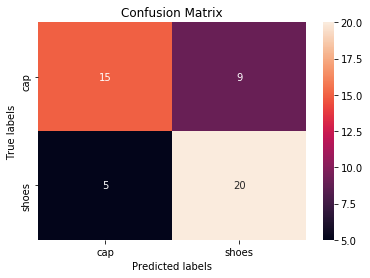

In [43]:
labels = ['cap','shoes']
cm = confusion_matrix(np.argmax(actual_labels ,axis=1), np.argmax(predictions, axis=1), [0,1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

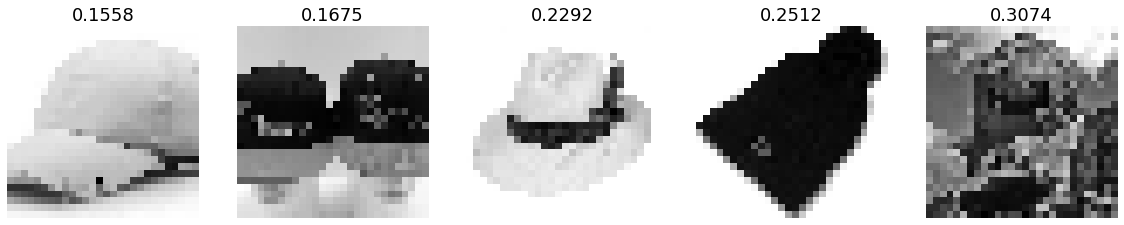

In [44]:
filter_ = (test_prediction_data['actual cap'] == 1) & (test_prediction_data['predicted_cap'] < threshold)
top_wrong_caps_ix = test_prediction_data[filter_]['predicted_cap'].sort_values().index.values[:5]
top_wrong_caps_values = test_prediction_data[filter_]['predicted_cap'].sort_values().values[:5]
plot_images(X_test[top_wrong_caps_ix],titles=top_wrong_caps_values)

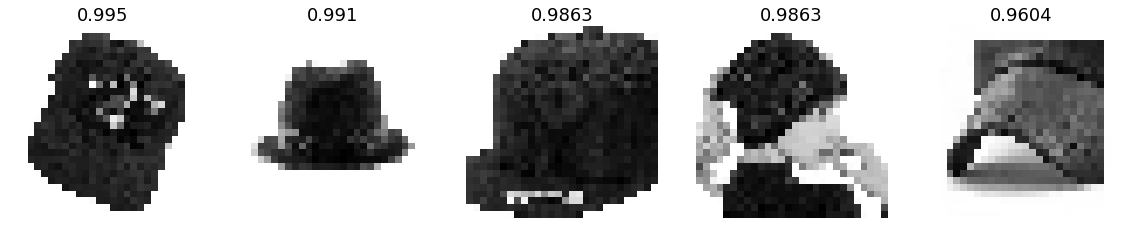

In [45]:
filter_ = (test_prediction_data['actual cap'] == 1) & (test_prediction_data['predicted_cap'] > threshold)
top_correct_caps_ix = test_prediction_data[filter_]['predicted_cap'].sort_values(ascending=False).index.values[:5]
top_correct_caps_values = test_prediction_data[filter_]['predicted_cap'].sort_values(ascending=False).values[:5]
plot_images(X_test[top_correct_caps_ix],titles=top_correct_caps_values)

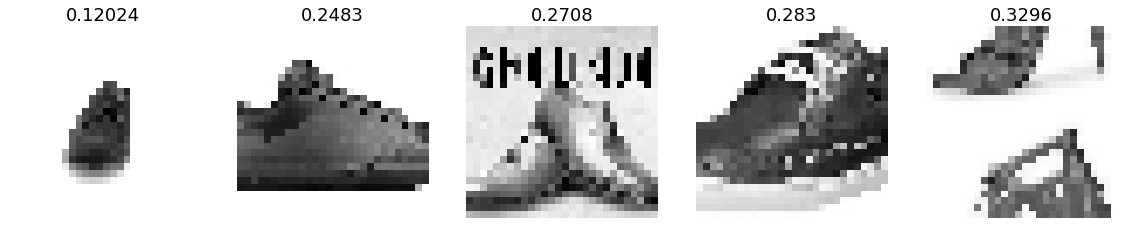

In [46]:
filter_ = (test_prediction_data['actual_shoes'] == 1) & (test_prediction_data['predicted_shoes'] < threshold)
top_wrong_shoes_ix = test_prediction_data[filter_]['predicted_shoes'].sort_values().index.values[:5]
top_wrong_shoes_values = test_prediction_data[filter_]['predicted_shoes'].sort_values().values[:5]
plot_images(X_test[top_wrong_shoes_ix],titles=top_wrong_shoes_values)

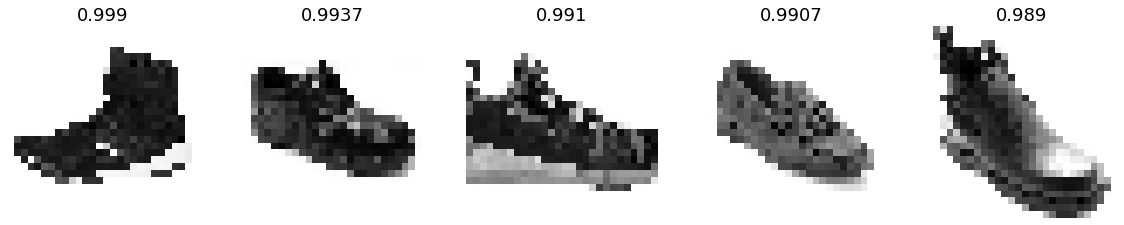

In [47]:
filter_ = (test_prediction_data['actual_shoes'] == 1) & (test_prediction_data['predicted_shoes'] > threshold)
top_correct_shoes_ix = test_prediction_data[filter_]['predicted_shoes'].sort_values(ascending=False).index.values[:5]
top_correct_shoes_values = test_prediction_data[filter_]['predicted_shoes'].sort_values(ascending=False).values[:5]
plot_images(X_test[top_correct_shoes_ix],titles=top_correct_shoes_values)